In [1]:
# Import required libraries
import pandas as pd
from pathlib import Path
from pandas.tseries.offsets import DateOffset

In [2]:
trading_df = pd.read_csv(
    Path("trailrun2.0.csv"), 
    index_col="time", 
    infer_datetime_format=True, 
    parse_dates=True
)

In [3]:
# Review the Data-Frame
trading_df.head()

,Index Level,close,"Cash Distribution (Cents-Per-Unit, AUD)",volume
time,,,,
2004-10-05,100,24.69,--,"600,000.00"
2004-10-06,99.49,24.56,--,"600,000.00"
2004-10-07,100.51,24.82,--,"600,000.00"
2004-10-08,98.47,24.31,--,"600,000.00"
2004-10-11,99.72,24.60,--,"1,050,000.00"


In [4]:
# Calculate the daily returns using the closing prices and the pct_change function
trading_df["actual_returns"] = trading_df["close"].pct_change()

# Drop all NaN values from the DataFrame
trading_df = trading_df.dropna()

# Review the DataFrame
display(trading_df.head())
display(trading_df.tail())

,Index Level,close,"Cash Distribution (Cents-Per-Unit, AUD)",volume,actual_returns
time,,,,,
2004-10-06,99.49,24.56,--,"600,000.00",-0.005265
2004-10-07,100.51,24.82,--,"600,000.00",0.010586
2004-10-08,98.47,24.31,--,"600,000.00",-0.020548
2004-10-11,99.72,24.60,--,"1,050,000.00",0.011929
2004-10-12,98.8,24.37,--,"2,400,000.00",-0.009350


,Index Level,close,"Cash Distribution (Cents-Per-Unit, AUD)",volume,actual_returns
time,,,,,
2022-07-06,327.32,49.23,--,"5,842,988.00",-0.012635
2022-07-07,324.78,49.84,--,"5,842,988.00",0.012391
2022-07-08,324.18,48.95,--,"5,834,688.00",-0.017857
2022-07-11,319.28,47.75,--,"5,834,688.00",-0.024515
2022-07-12,--,47.27,--,"5,826,388.00",-0.010052


In [5]:
# Define a window size of 4
short_window = 4

# Create a simple moving average (SMA) using the short_window and assign this to a new columns called sma_fast
trading_df["sma_fast"] = trading_df["close"].rolling(window=short_window).mean()

In [6]:
# Define a window size of 100
long_window = 100

# Create a simple moving average (SMA) using the long_window and assign this to a new columns called sma_slow
trading_df["sma_slow"] = trading_df["close"].rolling(window=long_window).mean()

In [7]:
# Drop the NaNs using dropna()
trading_df = trading_df.dropna()

In [8]:
# Assign a copy of the sma_fast and sma_slow columns to a new DataFrame called X
X = trading_df[["sma_fast", "sma_slow"]].copy()

# Display sample data
display(X.head())
display(X.tail())

,sma_fast,sma_slow
time,,
2005-02-22,23.4925,23.4507
2005-02-23,23.5675,23.4418
2005-02-24,23.6175,23.4312
2005-02-25,23.7825,23.4297
2005-02-28,23.9650,23.4264


,sma_fast,sma_slow
time,,
2022-07-06,49.6825,44.9246
2022-07-07,49.6125,44.8984
2022-07-08,49.4700,44.8640
2022-07-11,48.9425,44.8113
2022-07-12,48.4525,44.7526


In [9]:
# Create a new column in the trading_df called signal setting its value to zero.
trading_df["signal"] = 0.0

In [10]:
# Create the signal to buy
trading_df.loc[(trading_df["actual_returns"] >= 0), "signal"] = 1

In [11]:
# Create the signal to sell
trading_df.loc[(trading_df["actual_returns"] < 0), "signal"] = -1

In [12]:
# Copy the new signal column to a new Series called y.
y = trading_df["signal"].copy()

In [13]:
#TEST&SPLIT

In [14]:
# Select the start of the training period
training_begin =  X.index.min()

# Display the training begin date
print(training_begin)

2005-02-22 00:00:00


In [15]:
# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=3)
X.index.min() + DateOffset(months=3)
# Display the training end date
print(training_end)

2005-05-22 00:00:00


In [16]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Display sample data
X_train.head()

,sma_fast,sma_slow
time,,
2005-02-22,23.4925,23.4507
2005-02-23,23.5675,23.4418
2005-02-24,23.6175,23.4312
2005-02-25,23.7825,23.4297
2005-02-28,23.9650,23.4264


In [17]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end:]
y_test = y.loc[training_end:]

# Display sample data
X_test.head()

,sma_fast,sma_slow
time,,
2005-05-23,23.7675,23.5006
2005-05-24,23.8125,23.5032
2005-05-25,23.7025,23.5086
2005-05-26,23.5400,23.5143
2005-05-27,23.5475,23.5241


In [18]:
#STANDARDIZE
# Imports
from sklearn.preprocessing import StandardScaler

In [19]:
# Create a StandardScaler instance
scaler = StandardScaler()
 
# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)
 
# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [20]:
#SVM Modeling

In [21]:
# Imports
from sklearn import svm
from sklearn.metrics import classification_report

In [22]:
# Create the classifier model
svm_model = svm.SVC()
 
# Fit the model to the data using X_train_scaled and y_train
svm_model = svm_model.fit(X_train_scaled, y_train)

# Use the trained model to predict the trading signals for the training data
training_signal_predictions = svm_model.predict(X_train_scaled)

# Display the sample predictions
training_signal_predictions[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [23]:
# Evaluate the model using a classification report
training_report = classification_report(y_train, training_signal_predictions)
print(training_report)

              precision    recall  f1-score   support

        -1.0       0.71      0.22      0.33        23
         1.0       0.68      0.95      0.80        41

    accuracy                           0.69        64
   macro avg       0.70      0.58      0.56        64
weighted avg       0.70      0.69      0.63        64



In [24]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_predictions = svm_model.predict(X_test_scaled)

In [25]:
# Evaluate the model's ability to predict the trading signal for the testing data
svm_testing_report = classification_report(y_test, testing_signal_predictions)
print(svm_testing_report)

              precision    recall  f1-score   support

        -1.0       0.43      0.00      0.00      2159
         1.0       0.50      1.00      0.67      2176

    accuracy                           0.50      4335
   macro avg       0.47      0.50      0.34      4335
weighted avg       0.47      0.50      0.34      4335



In [26]:
# Create a new empty predictions DataFrame using code provided below.
predictions_df = pd.DataFrame(index=X_test.index)
predictions_df["predicted_signal"] = testing_signal_predictions
predictions_df["actual_returns"] = trading_df["actual_returns"]
predictions_df["trading_algorithm_returns"] = predictions_df["actual_returns"] * predictions_df["predicted_signal"]
predictions_df.head()

,predicted_signal,actual_returns,trading_algorithm_returns
time,,,
2005-05-23,1.0,-0.012495,-0.012495
2005-05-24,1.0,0.000000,0.000000
2005-05-25,1.0,-0.013918,-0.013918
2005-05-26,1.0,-0.000855,-0.000855
2005-05-27,1.0,0.016267,0.016267


<AxesSubplot:xlabel='time'>

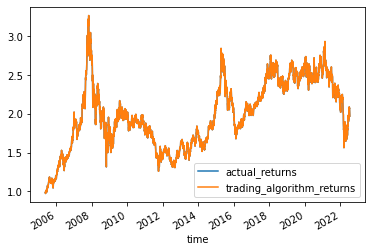

In [27]:
# Calculate and plot the cumulative returns for the `actual_returns` and the `trading_algorithm_returns`
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()

In [28]:
#LOGISTICREGRESSION
# Import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

In [29]:
# Create an instance of the LogisticRegression model
logistic_regression_model = LogisticRegression()

In [30]:
# Fit the LogisticRegression model
logistic_regression_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [31]:
# Use the trained LogisticRegression model to predict the trading signals for the training data
lr_training_signal_predictions = logistic_regression_model.predict(X_train_scaled)

# Display the predictions
lr_training_signal_predictions

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [32]:
# Generate a classification report using the training data and the logistic regression model's predications
lr_training_report = classification_report(y_train, lr_training_signal_predictions)

# Review the classification report
print(lr_training_report)

              precision    recall  f1-score   support

        -1.0       0.62      0.22      0.32        23
         1.0       0.68      0.93      0.78        41

    accuracy                           0.67        64
   macro avg       0.65      0.57      0.55        64
weighted avg       0.66      0.67      0.62        64



In [33]:
# Use the trained model to predict the trading signals for the testing data.
lr_testing_signal_predictions = logistic_regression_model.predict(X_test_scaled)

In [34]:
# Generate a classification report using the testing data and the logistic regression model's predictions
lr_testing_report = classification_report(y_test, lr_testing_signal_predictions)

# Review the testing classification report
print(lr_testing_report)

              precision    recall  f1-score   support

        -1.0       0.50      1.00      0.66      2159
         1.0       0.57      0.00      0.00      2176

    accuracy                           0.50      4335
   macro avg       0.53      0.50      0.33      4335
weighted avg       0.53      0.50      0.33      4335



In [35]:
# Print the classification report for the Logistic Regression model using the test data
print("Logistic Regression Classification Report")
print(lr_testing_report)

Logistic Regression Classification Report
              precision    recall  f1-score   support

        -1.0       0.50      1.00      0.66      2159
         1.0       0.57      0.00      0.00      2176

    accuracy                           0.50      4335
   macro avg       0.53      0.50      0.33      4335
weighted avg       0.53      0.50      0.33      4335



In [36]:
# Print the classification report for the SVM model using the test data
print("SVM Classification Report")
print(svm_testing_report)

SVM Classification Report
              precision    recall  f1-score   support

        -1.0       0.43      0.00      0.00      2159
         1.0       0.50      1.00      0.67      2176

    accuracy                           0.50      4335
   macro avg       0.47      0.50      0.34      4335
weighted avg       0.47      0.50      0.34      4335

